<a href="https://colab.research.google.com/github/sunneysood/deeplearning/blob/master/suny_sn1_gmail_com_LSTM_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment : 14

<pre>
1. Preprocess all the Data we have in DonorsChoose <a href='https://drive.google.com/drive/folders/1MIwK7BQMev8f5CbDDVNLPaFGB32pFN60'>Dataset</a> use train.csv
2. Combine 4 essay's into one column named - 'preprocessed_essays'. 
3. After step 2 you have to train 3 types of models as discussed below. 
4. For all the model use <a href='https://scikit-learn.org/stable/modules/model_evaluation.html#roc-metrics'>'auc'</a> as a metric. check <a href='https://datascience.stackexchange.com/a/20192'>this</a> for using auc as a metric 
5. You are free to choose any number of layers/hiddden units but you have to use same type of architectures shown below. 
6. You can use any one of the optimizers and choice of Learning rate and momentum, resources: <a href='http://cs231n.github.io/neural-networks-3/'>cs231n class notes</a>, <a href='https://www.youtube.com/watch?v=hd_KFJ5ktUc'>cs231n class video</a>. 
7. For all the model's use <a href='https://www.youtube.com/watch?v=2U6Jl7oqRkM'>TensorBoard</a> and plot the Metric value and Loss with epoch. While submitting, take a screenshot of plots and include those images in .ipynb notebook and PDF. 
8. Use Categorical Cross Entropy as Loss to minimize.
</pre>

In [0]:
#https://towardsdatascience.com/3-ways-to-load-csv-files-into-colab-7c14fcbdcb92
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [2]:
link = 'https://drive.google.com/open?id=1GpATd_pM4mcnWWIs28-s1lgqdAg2Wdv-'
fluff, id = link.split('=')
print (id) # Verify that you have everything after '='

1GpATd_pM4mcnWWIs28-s1lgqdAg2Wdv-


In [3]:
glove = 'https://drive.google.com/open?id=1pGd5tLwA30M7wkbJKdXHaae9tYVDICJ_'
fluff, id_glove = glove.split('=')
print (id) # Verify that you have everything after '='

1GpATd_pM4mcnWWIs28-s1lgqdAg2Wdv-


In [0]:
import pandas as pd
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('Filename.csv')  
project_data = pd.read_csv('Filename.csv')
# Dataset is now stored in a Pandas Dataframe

In [5]:
project_data.shape

(109248, 9)

In [6]:
project_data.head(2)

,school_state,teacher_prefix,project_grade_category,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories,essay,price
0,ca,mrs,grades_prek_2,53,1,math_science,appliedsciences health_lifescience,i fortunate enough use fairy tale stem kits cl...,725.05
1,ut,ms,grades_3_5,4,1,specialneeds,specialneeds,imagine 8 9 years old you third grade classroo...,213.03


In [7]:
is_approved=project_data.pop('project_is_approved')
print(project_data.shape)

(109248, 8)


In [0]:
#train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(project_data, is_approved, test_size=0.2, random_state=30,stratify=is_approved)

In [0]:
#train cv split
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.2, random_state=30,stratify=y_train)

In [10]:
#displaying shapes of train, test and cv datasets
print(X_train.shape)
print(X_cv.shape)
print(X_test.shape)
print(y_train.shape)
print(y_cv.shape)
print(y_test.shape)

(69918, 8)
(17480, 8)
(21850, 8)
(69918,)
(17480,)
(21850,)


In [11]:
#Code for using ROC-AUC curve as performance metric on the LSTM network
#https://datascience.stackexchange.com/questions/13746/how-to-define-a-custom-performance-metric-in-keras/20192#20192
import keras
import numpy as np
import sklearn.metrics as sklm


class Metrics(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        #self.confusion = []
        #self.precision = []
        #self.recall = []
        #self.f1s = []
        #self.kappa = []
        self.auc = []

    def on_epoch_end(self, epoch, logs={}):
        score = np.asarray(self.model.predict(self.validation_data[0]))
        predict = np.round(np.asarray(self.model.predict(self.validation_data[0])))
        targ = self.validation_data[1]

        self.auc.append(sklm.roc_auc_score(targ, score))
        #self.confusion.append(sklm.confusion_matrix(targ, predict))
        #self.precision.append(sklm.precision_score(targ, predict))
        #self.recall.append(sklm.recall_score(targ, predict))
        #self.f1s.append(sklm.f1_score(targ, predict))
        #self.kappa.append(sklm.cohen_kappa_score(targ, predict))

        return

metrics = Metrics()

Using TensorFlow backend.


In [12]:
X_train.dtypes

school_state                                     object
teacher_prefix                                   object
project_grade_category                           object
teacher_number_of_previously_posted_projects      int64
clean_categories                                 object
clean_subcategories                              object
essay                                            object
price                                           float64
dtype: object

In [13]:
#https://machinelearningmastery.com/prepare-text-data-deep-learning-keras/
from keras.preprocessing.text import text_to_word_sequence
# define the document
#https://stackoverflow.com/questions/33279940/how-to-combine-multiple-rows-of-strings-into-one-using-pandas
text = X_train['essay'].str.cat(sep=' ')
# estimate the size of the vocabulary
words = set(text_to_word_sequence(text))
vocab_size = len(words)
print(vocab_size)

47346


In [0]:
from keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train['essay'])

In [0]:
train_token = tokenizer.texts_to_sequences(X_train['essay'])
test_token = tokenizer.texts_to_sequences(X_test['essay'])
cv_token = tokenizer.texts_to_sequences(X_cv['essay'])

In [0]:
essay_train = keras.preprocessing.sequence.pad_sequences(train_token, maxlen=300, padding='post', truncating='post')
essay_test = keras.preprocessing.sequence.pad_sequences(test_token,  maxlen=300, padding='post', truncating='post')
essay_cv = keras.preprocessing.sequence.pad_sequences(cv_token,  maxlen=300, padding='post', truncating='post')

In [0]:
#https://stackoverflow.com/questions/21057621/sklearn-labelencoder-with-never-seen-before-values
from sklearn.preprocessing import LabelEncoder
import numpy as np

class LabelEncoderExt(object):
    def __init__(self):
        """
        It differs from LabelEncoder by handling new classes and providing a value for it [Unknown]
        Unknown will be added in fit and transform will take care of new item. It gives unknown class id
        """
        self.label_encoder = LabelEncoder()
        # self.classes_ = self.label_encoder.classes_

    def fit(self, data_list):
        """
        This will fit the encoder for all the unique values and introduce unknown value
        :param data_list: A list of string
        :return: self
        """
        self.label_encoder = self.label_encoder.fit(list(data_list) + ['Unknown'])
        self.classes_ = self.label_encoder.classes_

        return self

    def transform(self, data_list):
        """
        This will transform the data_list to id list where the new values get assigned to Unknown class
        :param data_list:
        :return:
        """
        new_data_list = list(data_list)
        for unique_item in np.unique(data_list):
            if unique_item not in self.label_encoder.classes_:
                new_data_list = ['Unknown' if x==unique_item else x for x in new_data_list]

        return self.label_encoder.transform(new_data_list)

In [0]:
#essay_train=X_train[['essay']]
#essay_test=X_test[['essay']]
#essay_cv=X_cv[['essay']]
#https://stackoverflow.com/questions/15112234/how-can-i-convert-columns-of-a-pandas-dataframe-into-a-list-of-lists

from sklearn.preprocessing import LabelEncoder
le_state = LabelEncoderExt()

le_state.fit(X_train['school_state'].values.tolist())
school_state_train =  le_state.transform(X_train['school_state'])
school_state_test =  le_state.transform(X_test['school_state'])
school_state_cv =  le_state.transform(X_cv['school_state'])

le_grade = LabelEncoderExt()
le_grade.fit(X_train['project_grade_category'].values.tolist())
grade_category_train = le_grade.transform(X_train['project_grade_category'])
grade_category_test = le_grade.transform(X_test['project_grade_category'])
grade_category_cv = le_grade.transform(X_cv['project_grade_category'])

le_category = LabelEncoderExt()
le_category.fit(X_train['clean_categories'].values.tolist())
clean_categories_train = le_category.transform(X_train['clean_categories'])
clean_categories_test = le_category.transform(X_test['clean_categories'])
clean_categories_cv = le_category.transform(X_cv['clean_categories'])

le_subcategory = LabelEncoderExt()
le_subcategory.fit(X_train['clean_subcategories'].values.tolist())
clean_subcategories_train = le_subcategory.transform(X_train['clean_subcategories'])
clean_subcategories_test = le_subcategory.transform(X_test['clean_subcategories'])
clean_subcategories_cv = le_subcategory.transform(X_cv['clean_subcategories'])

le_teacher = LabelEncoderExt()
le_teacher.fit(X_train['teacher_prefix'].values.tolist())
teacher_prefix_train =le_teacher.transform(X_train['teacher_prefix'])
teacher_prefix_test = le_teacher.transform(X_test['teacher_prefix'])
teacher_prefix_cv =le_teacher.transform( X_cv['teacher_prefix'])

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

numeric_digits_train = scaler.fit_transform(X_train[['teacher_number_of_previously_posted_projects','price']])
numeric_digits_cv = scaler.transform(X_cv[['teacher_number_of_previously_posted_projects','price']])
numeric_digits_test = scaler.transform(X_test[['teacher_number_of_previously_posted_projects','price']])

print("*" * 55)
print("Feature Engineering Complete")

*******************************************************
Feature Engineering Complete


### Model-1

Build and Train deep neural network as shown below

<img src='https://i.imgur.com/w395Yk9.png'>
ref: https://i.imgur.com/w395Yk9.png

- __Input_seq_total_text_data__ --- You have to give Total text data columns. After this use the Embedding layer to get word vectors. Use given predefined glove word vectors, don't train any word vectors. After this use LSTM and get the LSTM output and Flatten that output. 
- __Input_school_state__ --- Give 'school_state' column as input to embedding layer and Train the Keras Embedding layer. 
- __Project_grade_category__  --- Give 'project_grade_category' column as input to embedding layer and Train the Keras Embedding layer.
- __Input_clean_categories__ --- Give 'input_clean_categories' column as input to embedding layer and Train the Keras Embedding layer.
- __Input_clean_subcategories__ --- Give 'input_clean_subcategories' column as input to embedding layer and Train the Keras Embedding layer.
- __Input_clean_subcategories__ --- Give 'input_teacher_prefix' column as input to embedding layer and Train the Keras Embedding layer.
- __Input_remaining_teacher_number_of_previously_posted_projects._resource_summary_contains_numerical_digits._price._quantity__ ---concatenate remaining columns and add a Dense layer after that. 



- For LSTM, you can choose your sequence padding methods on your own or you can train your LSTM without padding, there is no restriction on that.

Below is an example of embedding layer for a categorical columns. In below code all are dummy values, we gave only for referance. 

In [0]:
# https://stats.stackexchange.com/questions/270546/how-does-keras-embedding-layer-work
#input_layer = Input(shape=(n,))
#embedding = Embedding(no_1, no_2, input_length=n)(input_layer)
#flatten = Flatten()(embedding)

### 1. Go through this blog, if you have any doubt on using predefined Embedding values in Embedding layer - https://machinelearningmastery.com/use-word-embedding-layers-deep-learning-keras/
### 2. Please go through this link https://keras.io/getting-started/functional-api-guide/ and check the 'Multi-input and multi-output models' then you will get to know how to give multiple inputs. 

In [0]:
from tensorflow import keras
from tensorflow.keras import layers

In [0]:
#clearing the graph of tensorflow
keras.backend.clear_session()

In [0]:
#https://stackoverflow.com/questions/51223936/tensorflow-invalidargumenterror-indices-while-training-with-keras/51224078
#Input_seq_total_text_data
input_seq_total_text_data = keras.Input(shape=(None,), name='input_seq_total_text_data')  # Variable-length sequence of ints
# Embed each word in the title into a 64-dimensional vector
input_seq_total_text_features = layers.Embedding(vocab_size + 1, 64)(input_seq_total_text_data)
# Reduce sequence of embedded words in the title into a single 128-dimensional vector
input_seq_total_text_features = layers.LSTM(128,return_sequences=True)(input_seq_total_text_features)
input_seq_total_text_features = layers.Dropout(0.25)(input_seq_total_text_features)
input_seq_total_text_features = layers.LSTM(64,return_sequences=True)(input_seq_total_text_features)
input_seq_total_text_features = layers.Dropout(0.25)(input_seq_total_text_features)
input_seq_total_text_features = layers.LSTM(32)(input_seq_total_text_features)
input_seq_total_text_features = layers.BatchNormalization()(input_seq_total_text_features)
input_seq_total_text_flatten=layers.Flatten()(input_seq_total_text_features)

In [0]:
#https://stackoverflow.com/questions/47666699/using-word2vec-to-classify-words-in-categories
#Input_school state_data
input_school_state_data = keras.Input(shape=(1,), name='input_school_state_data')  # Variable-length sequence of ints
# Embed each word in the title into a 64-dimensional vector
input_school_state_features = layers.Embedding(X_train['school_state'].nunique() + 1, 64)(input_school_state_data)
# Reduce sequence of embedded words in the title into a single 128-dimensional vector
#input_seq_total_text_features = layers.LSTM(128)(input_seq_total_text_features)
input_school_state_flatten=layers.Flatten()(input_school_state_features)

In [0]:
#Project_grade_category
project_grade_category_data = keras.Input(shape=(1,), name='project_grade_category_data')  # Variable-length sequence of ints
# Embed each word in the title into a 64-dimensional vector
project_grade_category_features = layers.Embedding(X_train['project_grade_category'].nunique()+ 1, 64)(project_grade_category_data)
project_grade_category_flatten=layers.Flatten()(project_grade_category_features)

In [0]:
#Input_clean_categories --- Give 'input_clean_categories' column as input to embedding layer and Train the Keras Embedding layer.
input_clean_categories_data = keras.Input(shape=(1,), name='input_clean_categories_data')  # Variable-length sequence of ints
# Embed each word in the title into a 64-dimensional vector
input_clean_categories_features = layers.Embedding(X_train['clean_categories'].nunique() + 1,64 )(input_clean_categories_data)
input_clean_categories_flatten=layers.Flatten()(input_clean_categories_features)

In [0]:
#input_clean_subcategories --- Give 'input_clean_subcategories' column as input to embedding layer and Train the Keras Embedding layer.
input_clean_subcategories_data = keras.Input(shape=(1,), name='input_clean_subcategories_data')  # Variable-length sequence of ints
# Embed each word in the title into a 64-dimensional vector
input_clean_subcategories_features = layers.Embedding(X_train['clean_subcategories'].nunique() +1 ,32 )(input_clean_subcategories_data)
input_clean_subcategories_flatten=layers.Flatten()(input_clean_subcategories_features)

In [0]:
#input_teacher_prefix --- Give 'input_teacher_prefix' column as input to embedding layer and Train the Keras Embedding layer.
input_teacher_prefix_data = keras.Input(shape=(1,), name='input_teacher_prefix_data')  # Variable-length sequence of ints
# Embed each word in the title into a 64-dimensional vector
input_teacher_prefix_features = layers.Embedding(X_train['teacher_prefix'].nunique() + 1,16 )(input_teacher_prefix_data)
input_teacher_prefix_flatten=layers.Flatten()(input_teacher_prefix_features)

In [0]:
#Input_remaining_teacher_number_of_previously_posted_projects._resource_summary_contains_numerical_digits._price._quantity

numeric_digits_data = keras.Input(shape=(2,), name='numeric_digits_data')  # Variable-length sequence of ints
numeric_digits_dense = layers.Dense(1, activation='relu')(numeric_digits_data)
#numeric_digits_flatten=layers.Flatten()(numeric_digits_dense)

In [31]:
# Merge all available features into a single large vector via concatenation
x = layers.concatenate([input_seq_total_text_flatten, 
                        input_school_state_flatten,
                        project_grade_category_flatten,
                        input_clean_categories_flatten,
                        input_clean_subcategories_flatten, 
                        input_teacher_prefix_flatten,
                        numeric_digits_dense])

print("*" * 55)
print("Initial Layers setup Complete")

*******************************************************
Initial Layers setup Complete


In [0]:
x = layers.Dense(128, activation='relu')(x)
x = layers.Dropout(0.25)(x)
x = layers.BatchNormalization()(x)
x = layers.Dense(64, activation='relu')(x)
x = layers.Dropout(0.45)(x)
x = layers.Dense(32, activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.Dense(32, activation='relu')(x)
x = layers.Dense(16, activation='relu')(x)

In [0]:
# Stick a department classifier on top of the features
output_layer = layers.Dense(units=1,activation='softmax',kernel_initializer="glorot_uniform",name='output')(x)

In [34]:
# Instantiate an end-to-end model predicting both priority and department
model = keras.Model(inputs=[input_seq_total_text_data, input_school_state_data, project_grade_category_data,input_clean_categories_data,
                            input_clean_subcategories_data,input_teacher_prefix_data,numeric_digits_data],
                    outputs=[output_layer])

print("*" * 55)
print("Model Setup Complete")

*******************************************************
Model Setup Complete


In [35]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_seq_total_text_data (Inpu [(None, None)]       0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, None, 64)     3030208     input_seq_total_text_data[0][0]  
__________________________________________________________________________________________________
lstm_2 (LSTM)                   (None, None, 128)    98816       embedding_1[0][0]                
__________________________________________________________________________________________________
dropout_1 (Dropout)             (None, None, 128)    0           lstm_2[0][0]                     
______________________________________________________________________________________________

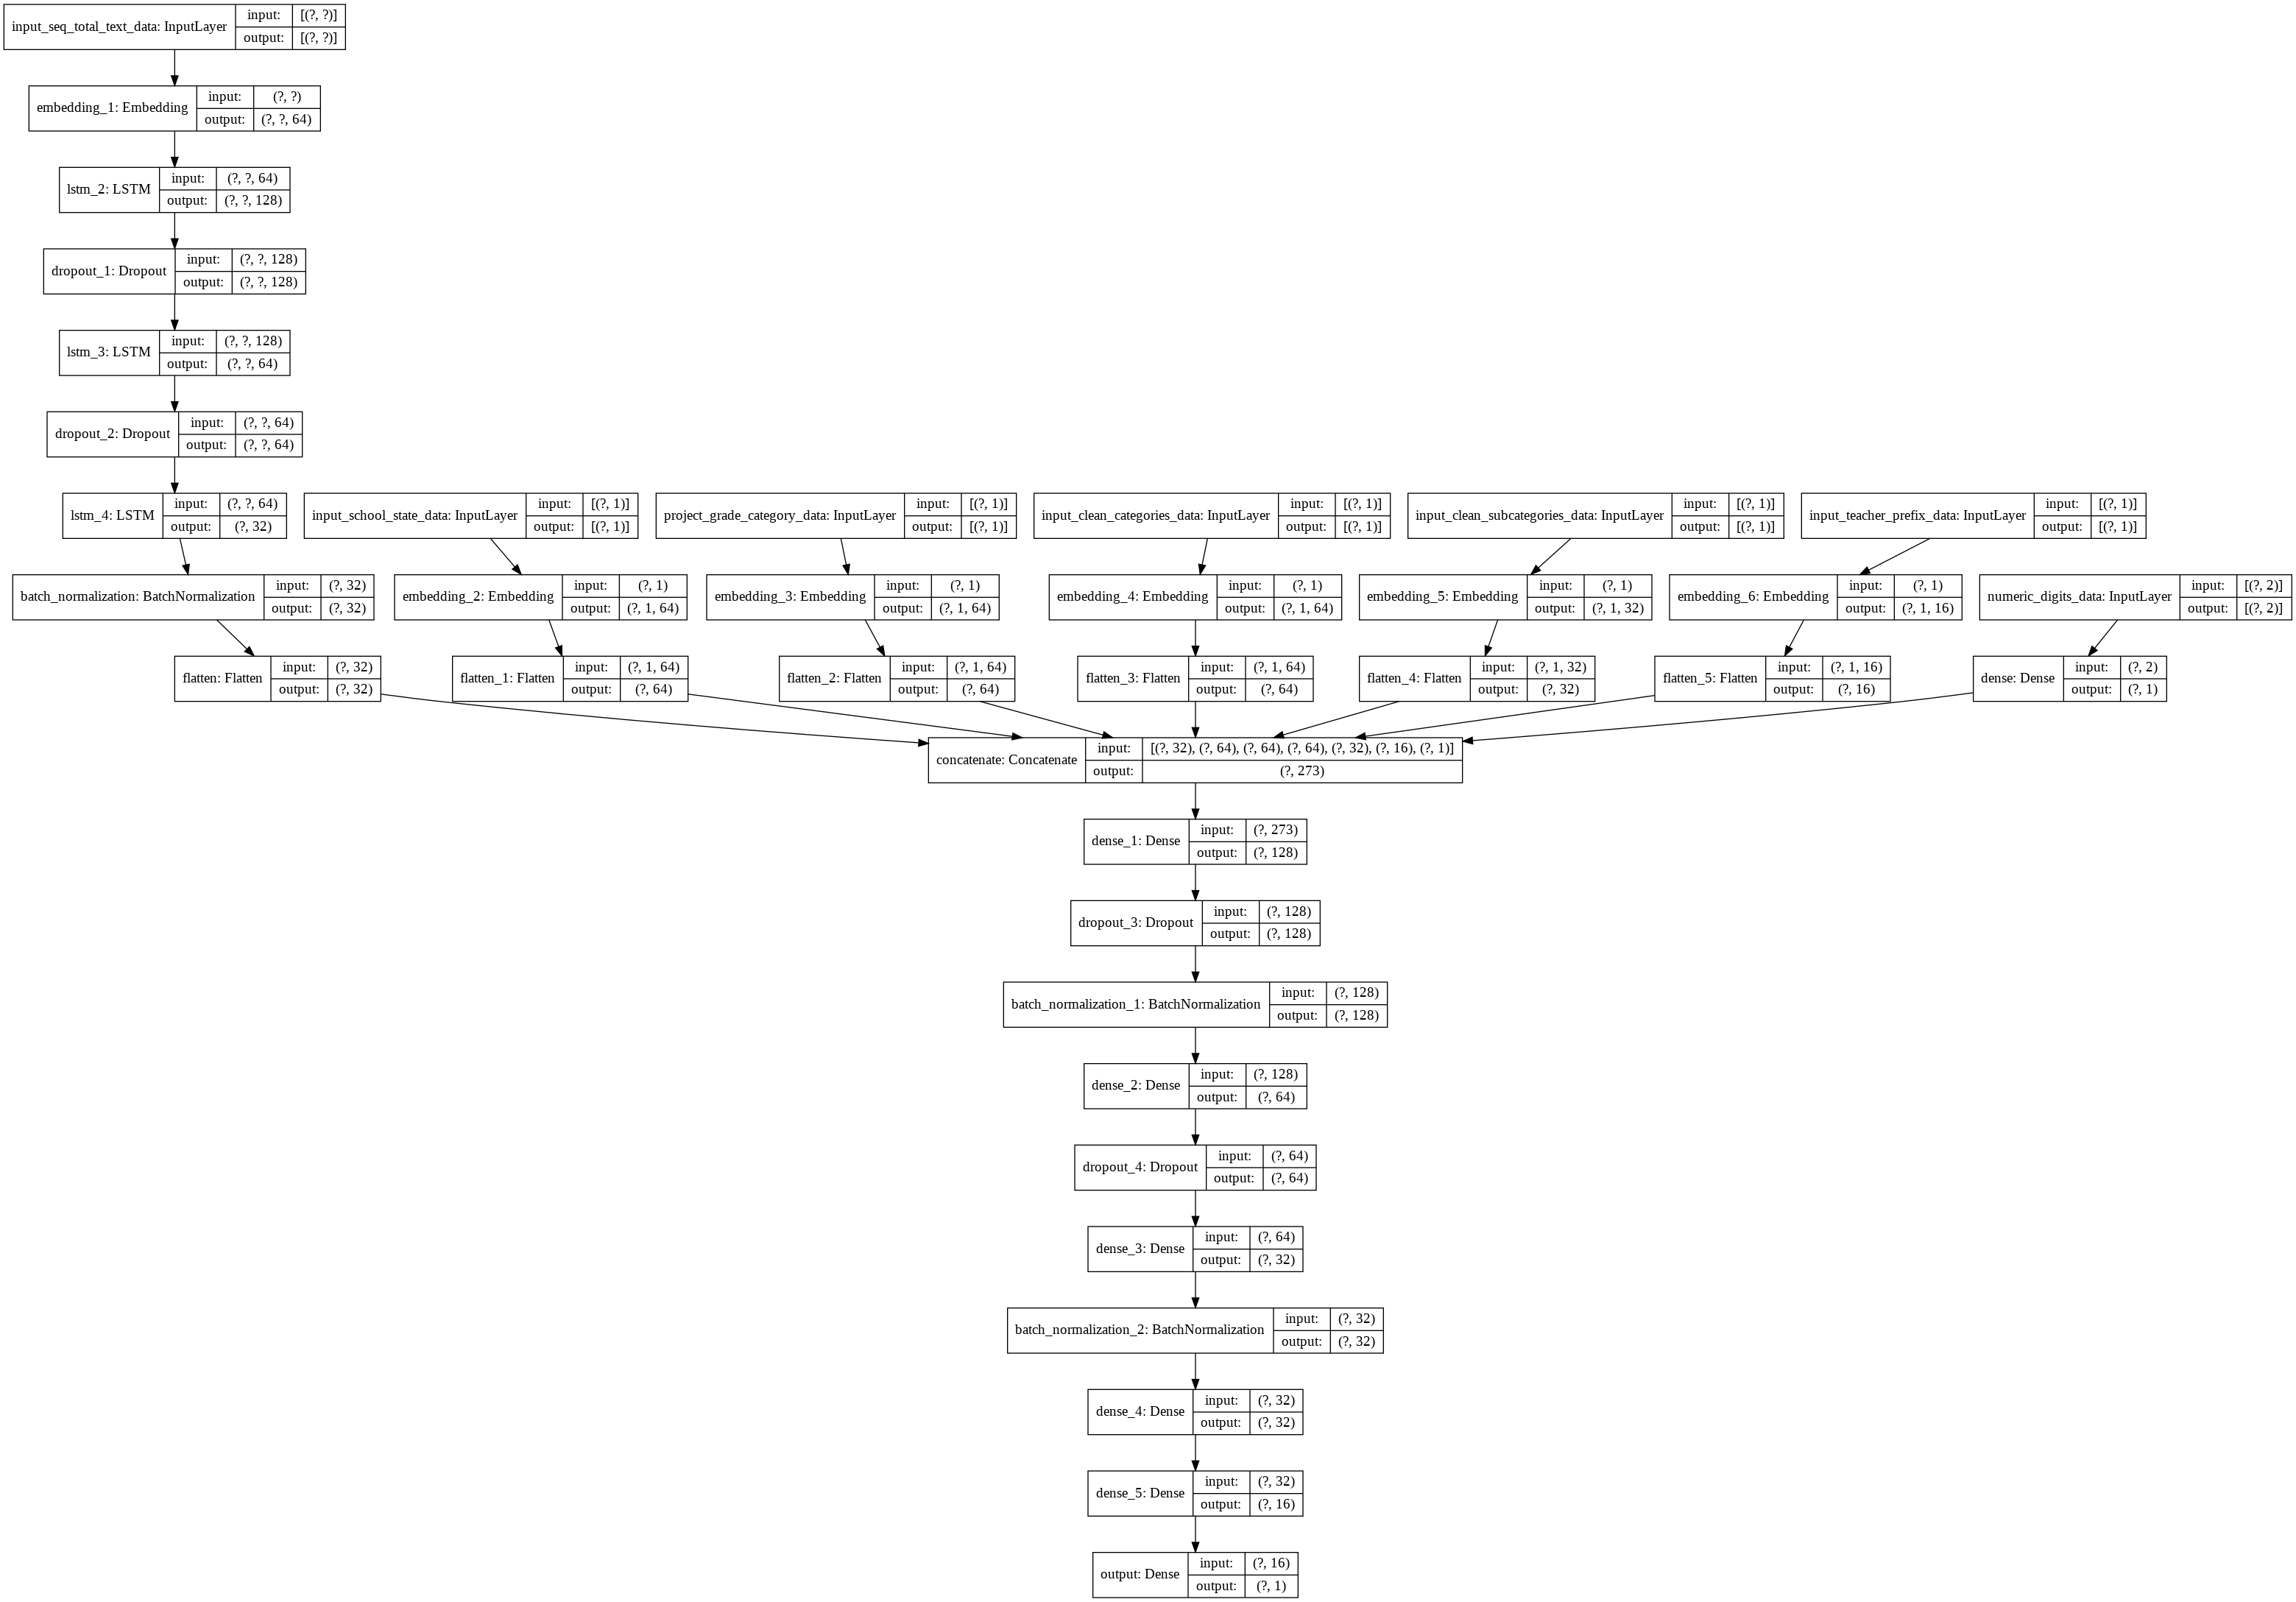

In [36]:
#https://www.tensorflow.org/guide/keras/functional#models_with_multiple_inputs_and_outputs
keras.utils.plot_model(model, 'lstm_model_1.png', show_shapes=True)

In [0]:
#https://www.tensorflow.org/tensorboard/get_started
# Load the TensorBoard notebook extension
%load_ext tensorboard

import tensorflow as tf
import datetime

# Clear any logs from previous runs
!rm -rf ./logs/ 

In [38]:
#https://stackoverflow.com/questions/41032551/how-to-compute-receiving-operating-characteristic-roc-and-auc-in-keras
#import tensorflow as tf
#from keras import backend as K

from tensorflow.keras import backend as K

def auc(y_true, y_pred):
    auc = tf.metrics.auc(y_true, y_pred)[1]
    K.get_session().run(tf.local_variables_initializer())
    return auc


model.compile(optimizer='adam',
              loss=['binary_crossentropy'],
              metrics=[auc])
              #metrics=[auc])

log_dir="logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

print("*" * 55)
print("Model Compilation Complete")

Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
*******************************************************
Model Compilation Complete


In [0]:
#https://datascience.stackexchange.com/questions/13746/how-to-define-a-custom-performance-metric-in-keras/20192#20192
model_input_train = [essay_train, school_state_train, grade_category_train,clean_categories_train,
                    clean_subcategories_train,teacher_prefix_train,numeric_digits_train]

model_input_cv = [essay_cv, school_state_cv, grade_category_cv,clean_categories_cv,
                    clean_subcategories_cv,teacher_prefix_cv,numeric_digits_cv]
  
model_input_test = [essay_test, school_state_test, grade_category_test,clean_categories_test,
                    clean_subcategories_test,teacher_prefix_test,numeric_digits_test]



In [0]:
#train
history = model.fit(model_input_train,y_train,
                    epochs=10,
                    batch_size=1500,
                    #verbose= 2,
                    #callbacks=[metrics],
                    #metrics=['accuracy'],
                    callbacks=[tensorboard_callback],
                    validation_data=(model_input_test,y_test))


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 69918 samples, validate on 21850 samples
Epoch 1/10
69918/69918 [==============================] - 964s 14ms/sample - loss: 2.3218 - auc: 0.5000 - val_loss: 2.3087 - val_auc: 0.5000
Epoch 2/10
69918/69918 [==============================] - 945s 14ms/sample - loss: 2.3218 - auc: 0.5000 - val_loss: 2.3087 - val_auc: 0.5000
Epoch 3/10
69000/69918 [============================>.] - ETA: 10s - loss: 2.3198 - auc: 0.5000

In [0]:
%tensorboard --logdir logs/fit

### Model-2

Use the same model as above but for 'input_seq_total_text_data' give only some words in the sentance not all the words. Filter the words as below. 

<pre>
1. Train the TF-IDF on the Train data <br>
2. Get the idf value for each word we have in the train data. <br>
3. Remove the low idf value and high idf value words from our data. Do some analysis on the Idf values and based on those values choose the low and high threshold value. Because very frequent words and very very rare words don't give much information. (you can plot a box plots and take only the idf scores within IQR range and corresponding words)<br>
4. Train the LSTM after removing the Low and High idf value words. (In model-1 Train on total data but in Model-2 train on data after removing some words based on IDF values)
</pre>

### Model-3

<img src='https://i.imgur.com/fkQ8nGo.png'>
ref: https://i.imgur.com/fkQ8nGo.png


- __input_seq_total_text_data__: <br>
<pre>
    . Use text column('essay'), and use the Embedding layer to get word vectors. <br>
    . Use given predefined glove word vectors, don't train any word vectors. <br>
    . Use LSTM that is given above, get the LSTM output and Flatten that output. <br>
    . You are free to preprocess the input text as you needed. <br>
</pre>
- __Other_than_text_data__:<br>
<pre>
    . Convert all your Categorical values to onehot coded and then concatenate all these onehot vectors <br>
    . Neumerical values and use <a href='https://keras.io/getting-started/sequential-model-guide/#sequence-classification-with-1d-convolutions'>CNN1D</a> as shown in above figure. <br>
    . You are free to choose all CNN parameters like kernel sizes, stride.<br>
    
</pre>